<a href="https://colab.research.google.com/github/youngnamh/PyTorch/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn #all of pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

In [ ]:
# Use linear regression formula to make a straight line with known parameters

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y= weight * X +bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

# Splittting data into training and test sets

In [ ]:
# create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

#visualize data


In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

# Plots training data, test data and compares predicitions.

  plt.figure(figsize=(10,7))

  #plot training data in blue

  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

  # plot test data in green

  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")

  # Are there predictions?

  if predictions is not None:
    #plot the prediction if they exist
    plt.scatter(test_data, predictions, c="r", label="Predictions")

  # The Legend
  plt.legend(prop={"size":14});


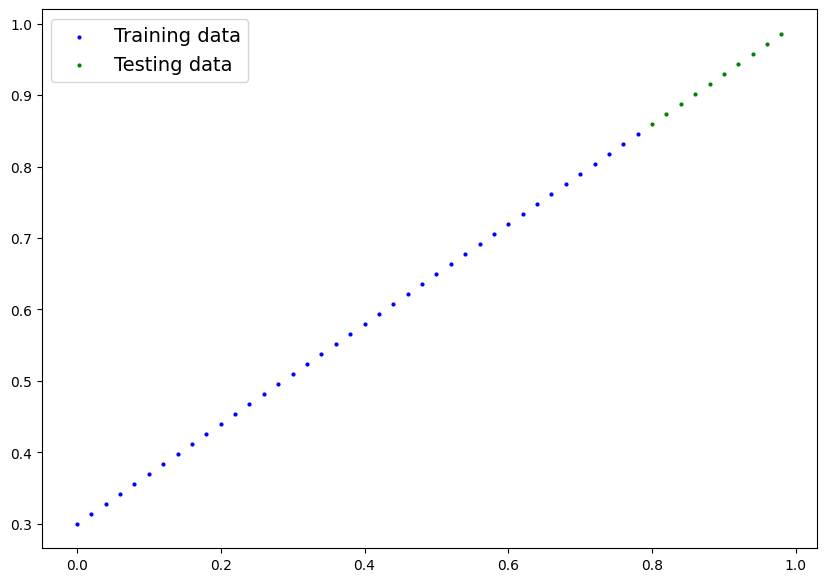

In [ ]:
plot_predictions();

# Build Pytorch Model

1. start with random values (weight and bias)
2. Look at trainign data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias valies we used to create the data)


How?

2 main algorithms:
1. Gradient Descent
2. Back Propagation

In [ ]:
class LinearRegressionModel (nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))

  #forward method to define the computation in the model
  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias #linear regression formula




# Pytorch model building essentials

1 - torch.nn

2 - torch.nn.Parameter

3 - torch.nn.Module

4 - torch.optim

5 - def Forward()

In [ ]:
# Create random seed
torch.manual_seed(42)

#Create an instance of the model
model0 = LinearRegressionModel()
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
#Predictions using torch.inference_mode()
with torch.inference_mode():
  y_preds = model0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

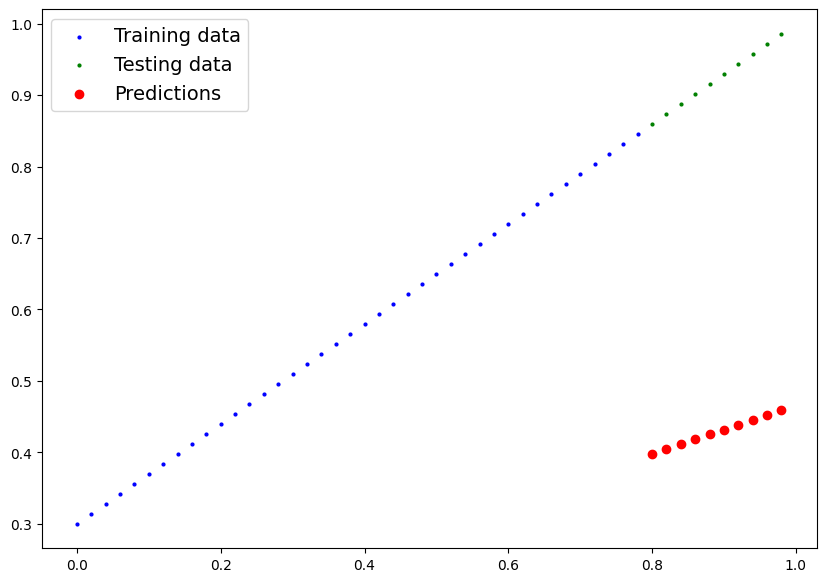

In [ ]:
plot_predictions(predictions=y_preds)

#Train Model


In [ ]:
# One way to measure how wrong model is, is to use a loss function.

##Things needed to train

Forward function : produces the output of a neural network by performing a series of computations on the input data

Loss/cost function : measures how wrong your model’s predictions are to the ideal output. (Lower is better)

Optimizer: Takes into account the loss of a model and adjusts the models parameters to improve the loss function.

learning rate: by how much the model adjusts

In [ ]:
#setup loss function
loss_fun = nn.L1Loss()

#setup optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.01) #lr = learning rate, very important hyper param (param we set ourselves)



#Training Loop

1 - loop through data

2 - forward pass (forward method)

3 - Calculate the loss

4 - Optimizer zero grad

5 - Loss backward - move backward through the network to calculate the gradient of each of the parameters (back propogation)

6 - optimizer step - use optimizer to adjust model's parameters to improve the loss (gradient descent)

In [ ]:
#epoch (1 loop through data)
torch.manual_seed(42)

epochs = 1000

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  #set the model to training mode
  model0.train() #train mode in Pytorch sets all parameters that require gradients to require gradients

  #2 forward pass
  y_pred = model0(X_train) #performs forward method

  #3 calculate the loss (difference between prediction and training data)
  loss = loss_fun(y_pred, y_train)

  #4 optimizer zero grade
  optimizer.zero_grad()

  #5 perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #6 step the optimizer (gradient descent)
  optimizer.step() #bydefault how the iptimizer changes will accumulate through the loop. we have to zero them above in step 4

  ### Testing
  model0.eval() #turns off settings not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode(): #turns off gradient tracking and some more things behind the scenes
    #1 do the forward pass
    test_pred = model0(X_test)

    #2 calculate the loss
    test_loss = loss_fun(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(model0.state_dict())
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)





#print(f"Loss: {loss}") #loss should be going down


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

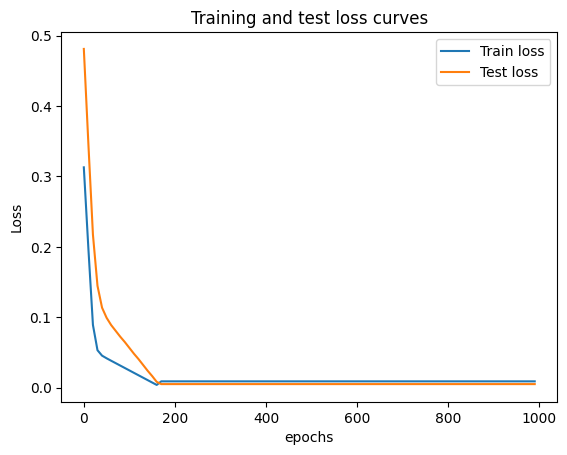

In [ ]:
import numpy as np

lossNP = np.array(torch.tensor(loss_values).cpu().numpy())


#plot the loss curves
plt.plot(epoch_count, lossNP, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend();

In [ ]:
model0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

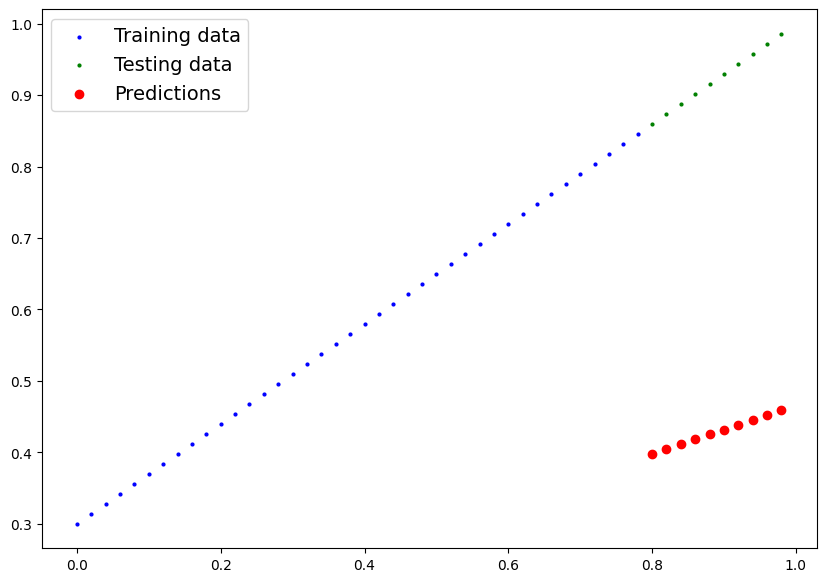

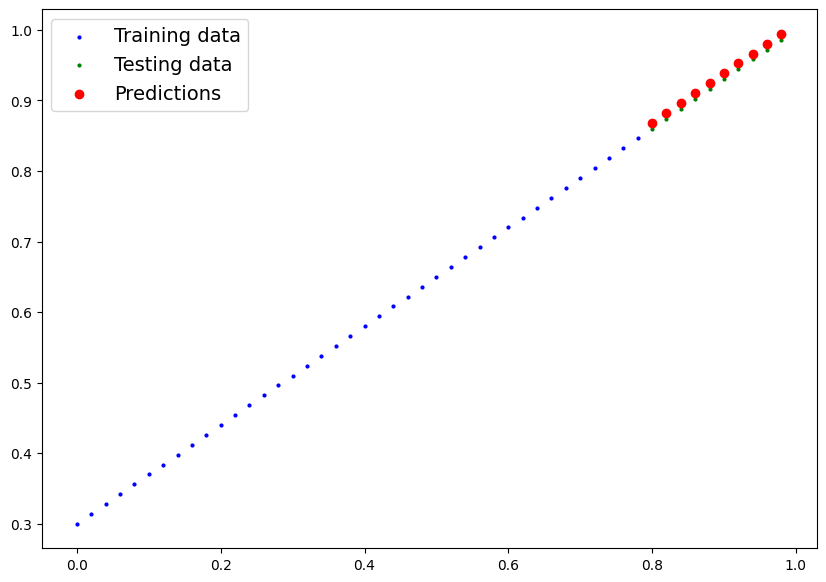

In [ ]:
with torch.inference_mode():
  y_preds_trained = model0(X_test)

plot_predictions(predictions=y_preds)
plot_predictions(predictions=y_preds_trained)

# Saving a model in Pytorch

3 main methods for saving and loading (check save and load documentation)

1. torch.save() -
2. torch.load()
3. torch.nn.Module.load_state_dict() (load a model's saved state dictionary)


In [ ]:
# saving pytorch model

from pathlib import Path

# 1. create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = "01_pytorch_workflow_model0.pth"
MODEL_SAVE_PATH = MODEL_PATH /MODEL_NAME

# 3. save the model statedict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model0.state_dict(),f=MODEL_SAVE_PATH)



Saving model to: models/01_pytorch_workflow_model0.pth


# Load a model in Pytorch

In [ ]:
#since we saved our model's state_dict() rather than the entire model, we'll create a new instance of our model class and load the saved state_dict() into that

# to load have to instantiate a new instance of our model class

loaded_model_0 = LinearRegressionModel()

#Load the saved state_dict of model0 which will update the new instance with updated parameters

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
model0.state_dict(), loaded_model_0.state_dict()

(OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))]),
 OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))]))

In [ ]:
#Make predicitons with loaded model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
loaded_model_preds, y_preds

(tensor([[0.8685],
         [0.8825],
         [0.8965],
         [0.9105],
         [0.9245],
         [0.9384],
         [0.9524],
         [0.9664],
         [0.9804],
         [0.9944]]),
 tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]))

In [ ]:
model0.eval()
with torch.inference_mode():
  y_preds = model0(X_test)

loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting it all together **

In [ ]:
# import pytorch and matplotlib

import torch
from torch import nn
import matplotlib.pyplot as plt

# check putorch version
torch.__version__

'2.0.1+cu118'

Create device-agnostic code which allows our code to run on GPU if one is available, but will default to CPU

In [ ]:
# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


# Data

In [ ]:
# create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

# create x and y

X = torch.arange(start,end,step).unsqueeze(dim=1) #need unsqueeze
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
#split data

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split] , y[:train_split]
X_test, y_test = X[train_split:] , y[train_split:]

len(X_train),len(X_test) , len(y_train),len(y_test)

(40, 10, 40, 10)

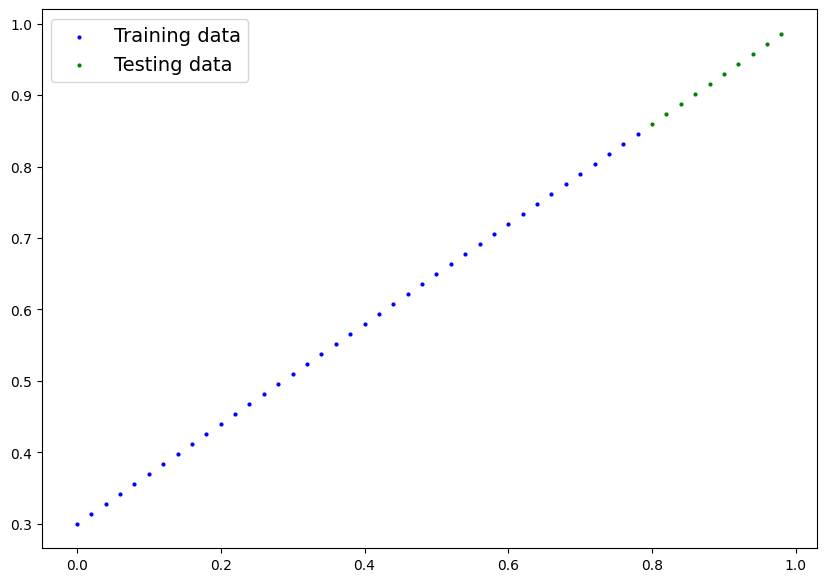

In [ ]:
#plot the data
#Note: if you don't have the plot_predictions() function loaded this will error

plot_predictions(X_train,y_train,X_test,y_test)


In [ ]:
# build pytorch model (this time using torch.nn)

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #use nn.Linear for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,out_features=1) # 1 x (in) gives 1 y (out)

  def forward(self,x : torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

#set manual seed
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
#check model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
#set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

# Training

1. Loss function
2. Optimizer
3. Training Loop
4. Testing Loop

In [ ]:
# loss function
loss_fn = nn.L1Loss() #same as MAE

# optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.001)

In [ ]:
# Training loop

torch.manual_seed(42)

epochs=1000

#put data on target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  #Forward pass
  y_pred = model_1(X_train)

  #Calculate loss
  loss = loss_fn(y_pred, y_train)

  #optimizer zero grad
  optimizer.zero_grad()

  #back propogation
  loss.backward()

  #optimizer step
  optimizer.step()

  #testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  ## print out whats happening

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Loss: 0.0012645035749301314 | Test loss: 0.0016779005527496338
Epoch: 10 | Loss: 0.0004109673318453133 | Test loss: 0.000919169164262712
Epoch: 20 | Loss: 0.000700173550285399 | Test loss: 0.00025067926617339253
Epoch: 30 | Loss: 0.000700173550285399 | Test loss: 0.00025067926617339253
Epoch: 40 | Loss: 0.000700173550285399 | Test loss: 0.00025067926617339253
Epoch: 50 | Loss: 0.000700173550285399 | Test loss: 0.00025067926617339253
Epoch: 60 | Loss: 0.000700173550285399 | Test loss: 0.00025067926617339253
Epoch: 70 | Loss: 0.000700173550285399 | Test loss: 0.00025067926617339253
Epoch: 80 | Loss: 0.000700173550285399 | Test loss: 0.00025067926617339253
Epoch: 90 | Loss: 0.000700173550285399 | Test loss: 0.00025067926617339253
Epoch: 100 | Loss: 0.000700173550285399 | Test loss: 0.00025067926617339253
Epoch: 110 | Loss: 0.000700173550285399 | Test loss: 0.00025067926617339253
Epoch: 120 | Loss: 0.000700173550285399 | Test loss: 0.00025067926617339253
Epoch: 130 | Loss: 0.000

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6992]])),
             ('linear_layer.bias', tensor([0.2996]))])

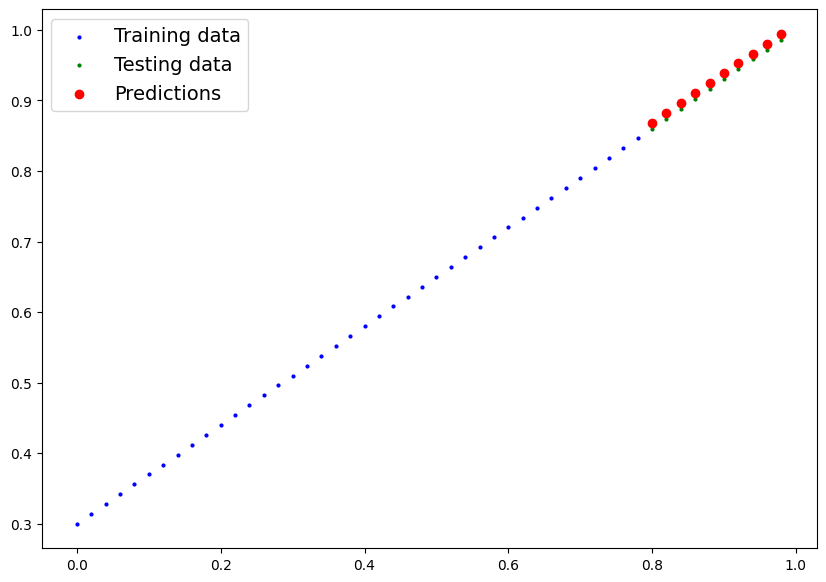

In [ ]:
model_1.eval()

with torch.inference_mode():
  y_preds_trained = model0(X_test)

plot_predictions(predictions=y_preds_trained)

In [ ]:
# save and load model

from pathlib import Path

# Create models directly
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
#Load a Pytorch

from pathlib import Path

# Create models directly
MODEL_PATH = Path("models")
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#Create new instance of linear regression model v2
loaded_model_1 = LinearRegressionModelV2()

#load the saved model state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
